In [1]:
### JUPYTER NOTEBOOK / MODULE PATH FIX ###
import sys

if "/share/apps/python/3.8.6/intel/lib/python3.8" in sys.path and sys.path[1] == '':
    sys.path[1], sys.path[6] = sys.path[6], sys.path[1]

In [2]:
from jtb_2022_code.utils.figure_data import load_rapa_bulk_data, rapa_bulk_times
from jtb_2022_code import FigureSingleCellData

import anndata as ad
import scanpy as sc

import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300

/home/cj59/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/cj59/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/cj59/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/cj59/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


2023-02-24 16:42:27 2 Preprocessing methods selected: Predictor method zscore [limit 10] Response method zscore [limit 10] Pre-TFA expression method robustscaler [limit 20] 


In [3]:
#data = FigureSingleCellData()


In [4]:
rapa_bulk, rapa_bulk_meta = load_rapa_bulk_data()
rapa_bulk = rapa_bulk.drop(rapa_bulk.columns[rapa_bulk.sum(axis=0) == 0], axis=1)
rapa_bulk

Loading Bulk Data from /home/cj59/Documents/R/rapa_20210628/data/20210312_RAPA_BULK_TIMECOURSE.tsv.gz


,YAL063C-A,YAL063C,YAL062W,YAL061W,YAL060W,YAL059W,YAL058W,YAL056W,YAL055W,YAL054C,...,YPR188C,YPR189W,YPR190C,YPR191W,YPR192W,YPR193C,YPR194C,YPR196W,YPR198W,YPR199C
TCAGTCACTATC,0,0,0,3,1,2,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
TTCTGTCCGCAG,0,0,5,0,11,2,0,0,0,1,...,0,0,0,12,0,0,0,0,4,2
GTACTAGGTTCC,0,0,3,7,15,2,1,0,0,0,...,0,0,3,20,0,0,0,0,3,0
GATCCGTTATCC,0,3,5,10,46,1,5,0,3,4,...,0,0,5,42,0,0,0,0,4,0
ATTCTAGCATCA,0,0,6,12,24,2,1,1,2,0,...,0,0,2,16,0,0,1,0,5,0
TTGGTCAATGGT,0,2,15,25,51,1,0,3,4,1,...,0,0,6,106,2,2,0,1,7,2
GCATGTACACCG,0,0,18,19,65,0,6,0,11,1,...,0,0,1,59,0,2,0,1,7,1
GACGTGTTAAGA,0,0,0,5,8,0,3,0,1,0,...,1,1,1,12,0,0,0,0,2,0
TGCCAATAGCGG,0,2,8,8,31,1,6,0,9,0,...,0,0,1,32,0,1,0,0,16,1
CTGTGCTAGTGA,0,0,6,1,22,0,0,1,0,0,...,1,0,0,51,0,0,0,1,4,1


In [49]:
rapa_bulk.sum(axis=1)

TCAGTCACTATC      8017
TTCTGTCCGCAG     23904
GTACTAGGTTCC     49005
GATCCGTTATCC     78896
ATTCTAGCATCA     41933
TTGGTCAATGGT    100144
GCATGTACACCG     77734
GACGTGTTAAGA     12358
TGCCAATAGCGG     62241
CTGTGCTAGTGA     35551
CTTCAATCCAAC    109779
TCAGTCACTATC     41406
TTCTGTCCGCAG      3800
GTACTAGGTTCC     28779
GATCCGTTATCC     21266
ATTCTAGCATCA     56324
TTGGTCAATGGT     43609
GCATGTACACCG     58152
GACGTGTTAAGA     63898
TGCCAATAGCGG     13261
CTGTGCTAGTGA     39307
CTTCAATCCAAC     34798
TCAGTCACTATC     23822
TTCTGTCCGCAG     35080
GTACTAGGTTCC    111293
GATCCGTTATCC     55309
ATTCTAGCATCA     85425
TTGGTCAATGGT     51963
GCATGTACACCG     27498
GACGTGTTAAGA     27601
TGCCAATAGCGG     35201
CTGTGCTAGTGA     41501
CTTCAATCCAAC     84977
dtype: int64

In [5]:
rapa_bulk_meta

,Oligo,Time,Replicate
TCAGTCACTATC,2108,0.0,1
TTCTGTCCGCAG,2109,2.5,1
GTACTAGGTTCC,2110,5.0,1
GATCCGTTATCC,2111,7.5,1
ATTCTAGCATCA,2112,10.0,1
TTGGTCAATGGT,2113,15.0,1
GCATGTACACCG,2375,30.0,1
GACGTGTTAAGA,2376,45.0,1
TGCCAATAGCGG,2377,60.0,1
CTGTGCTAGTGA,2378,90.0,1


In [23]:
adata = ad.AnnData(rapa_bulk)
sc.pp.normalize_per_cell(
    adata,
    min_counts=0,
)
sc.pp.filter_genes(
    adata,
    min_counts=100,
)
adata.obs = rapa_bulk_meta
adata.obs['Time'] = adata.obs['Time'].cat.reorder_categories(['0.0', '2.5', '5.0', '7.5', '10.0', '15.0', '30.0', '45.0', '60.0', '90.0', '120.0'])
adata

<ipython-input-23-0029072e3adf>:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(rapa_bulk)
/home/cj59/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/cj59/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/cj59/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 33 × 1196
    obs: 'Oligo', 'Time', 'Replicate'
    var: 'n_counts'

In [24]:
import numpy as np
import scanpy as sc
import anndata as ad
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

import sys
sys.setrecursionlimit(10000)

_ami_idx = np.array(
    dendrogram(
        linkage(
            squareform(pairwise_distances(adata.X.T, metric="euclidean"), checks=False), 
            metric='correlation'), 
        no_plot=True
    )['leaves']
)

adata.X[adata.obs['Time'].isin(['0.0', '10.0', '30.0', '60.0', '90.0']), :] - adata.X[adata.obs['Time'].isin(['0.0', '7.5', '15.0', '45.0', '120.0']), :]

In [50]:
residuals = ad.AnnData(
    adata.X[adata.obs['Time'].isin(['7.5']), :] - adata.X[adata.obs['Time'].isin(['5.0']), :],
    dtype=float
)
residuals.var = adata.var
residuals.obs['Group'] = 1


/home/cj59/.local/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


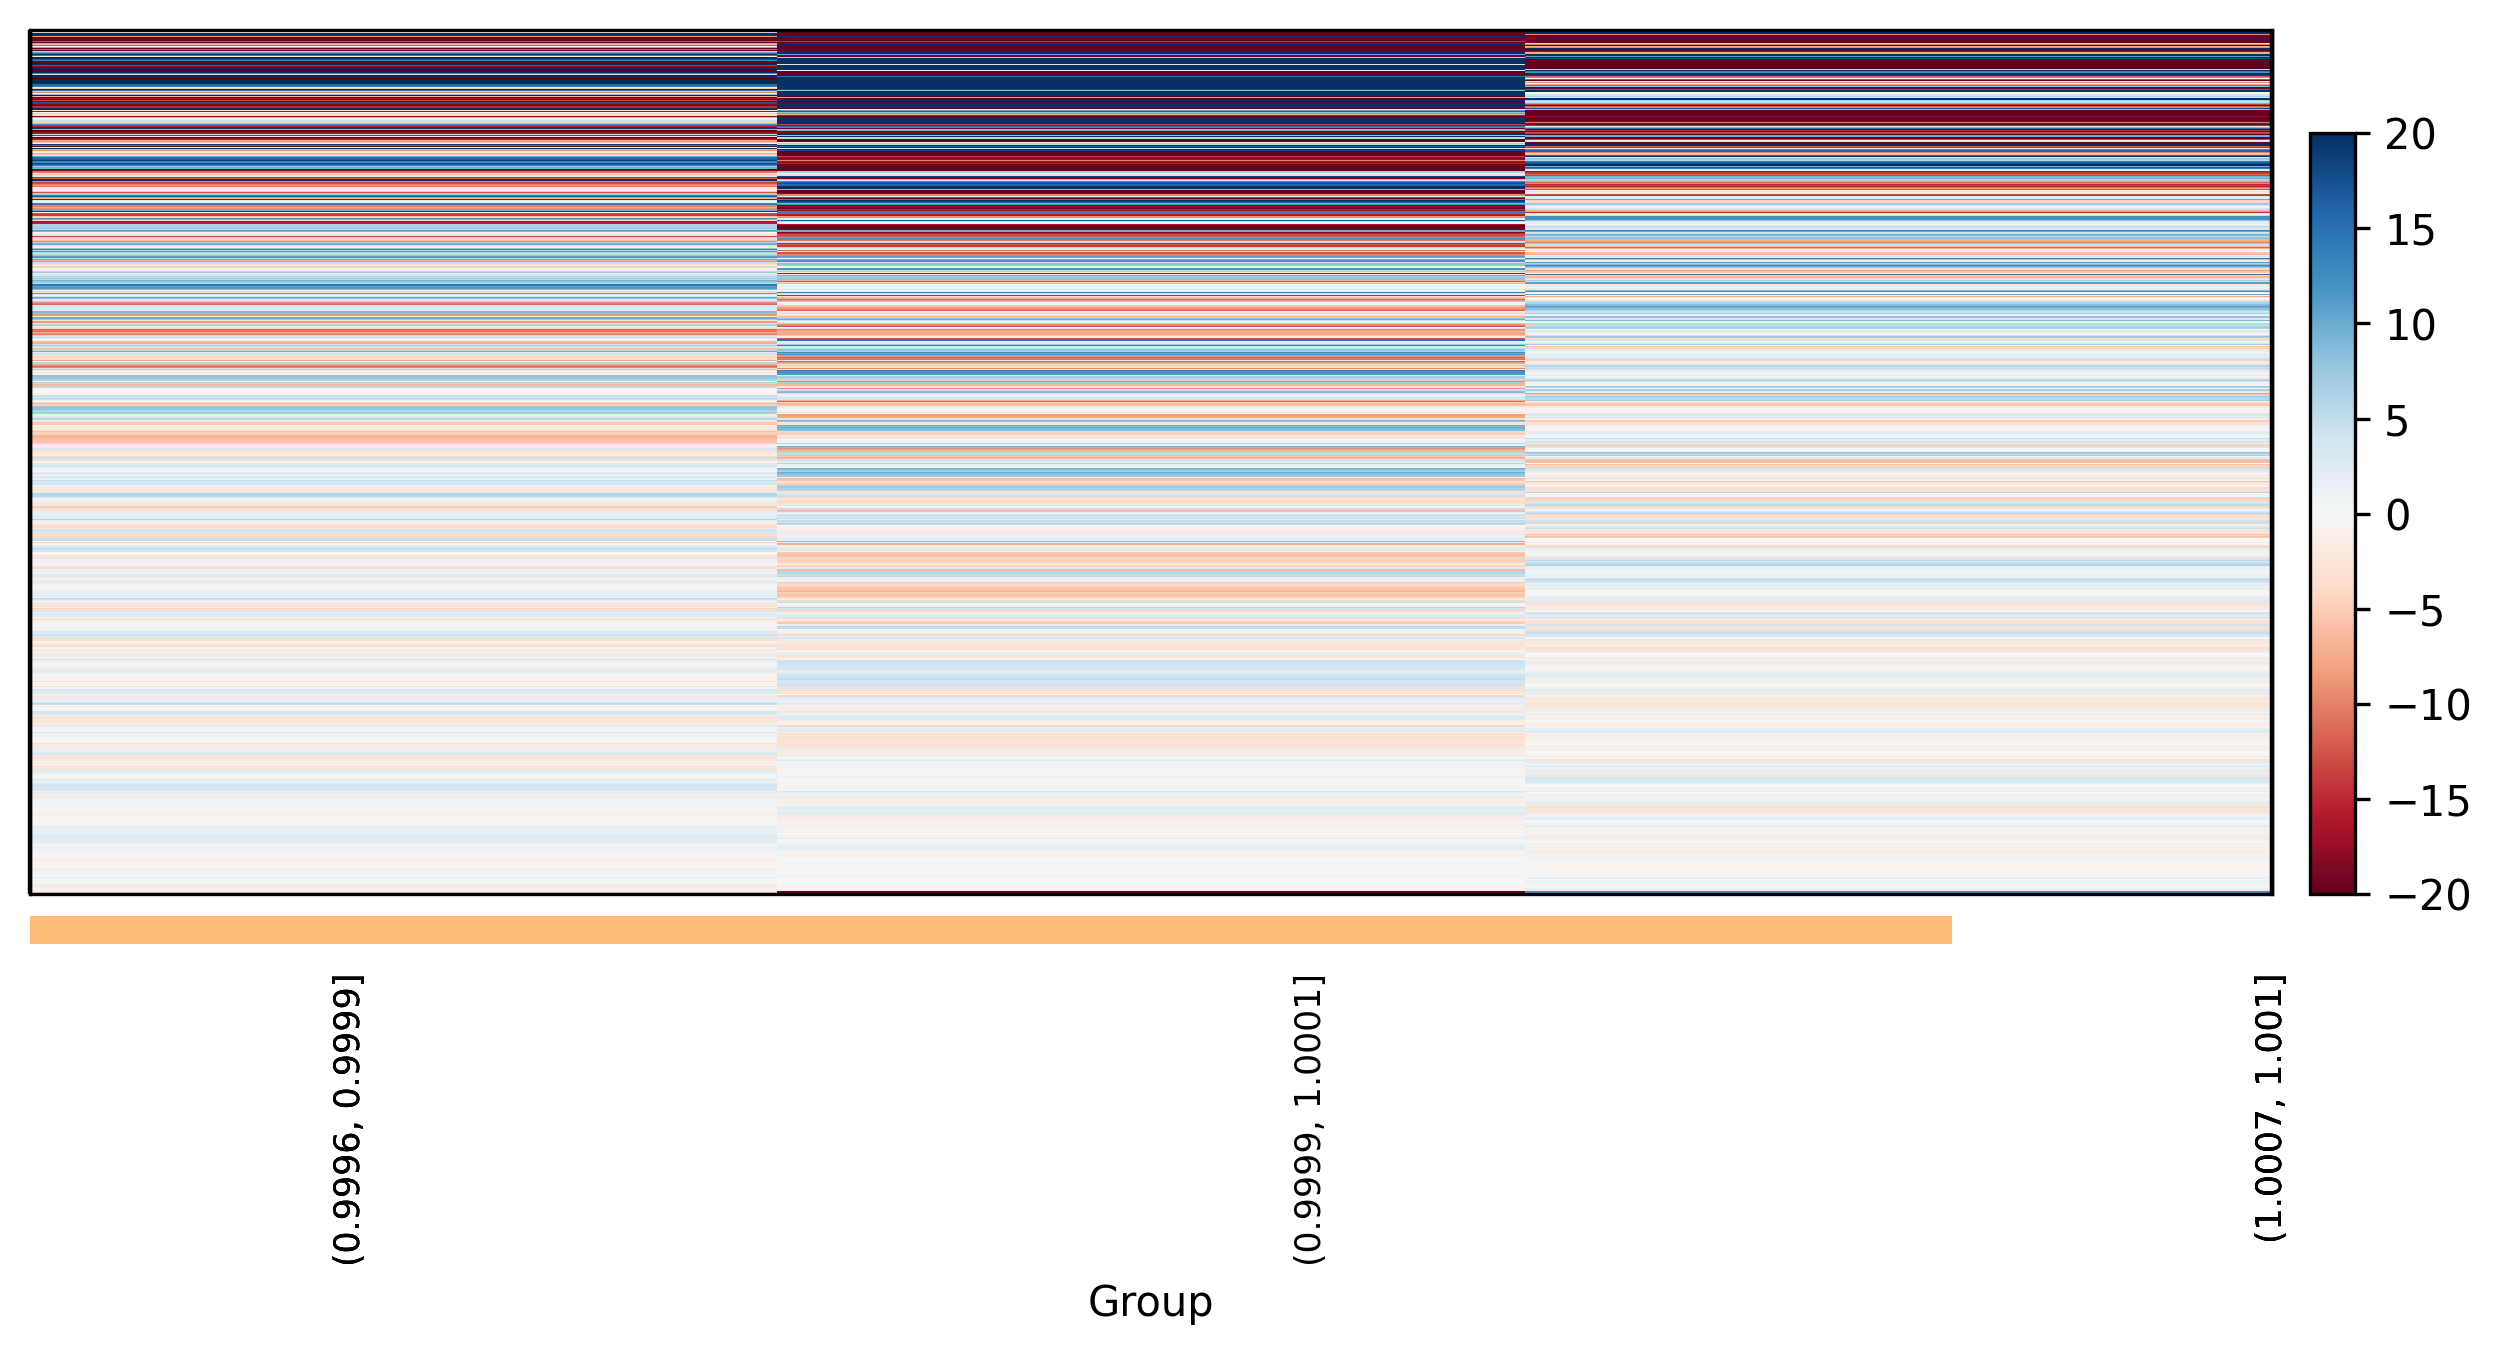

In [52]:
_red_idx = np.array(
    dendrogram(
        linkage(
            squareform(pairwise_distances(residuals.X.T, metric="euclidean"), checks=False), 
            metric='correlation'), 
        no_plot=True
    )['leaves']
)


sc.pl.heatmap(residuals[:, _red_idx], residuals.var_names[_red_idx], ['Group'], vmin=-20, vcenter=0, vmax=20, cmap='RdBu', swap_axes=True)

/home/cj59/.local/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


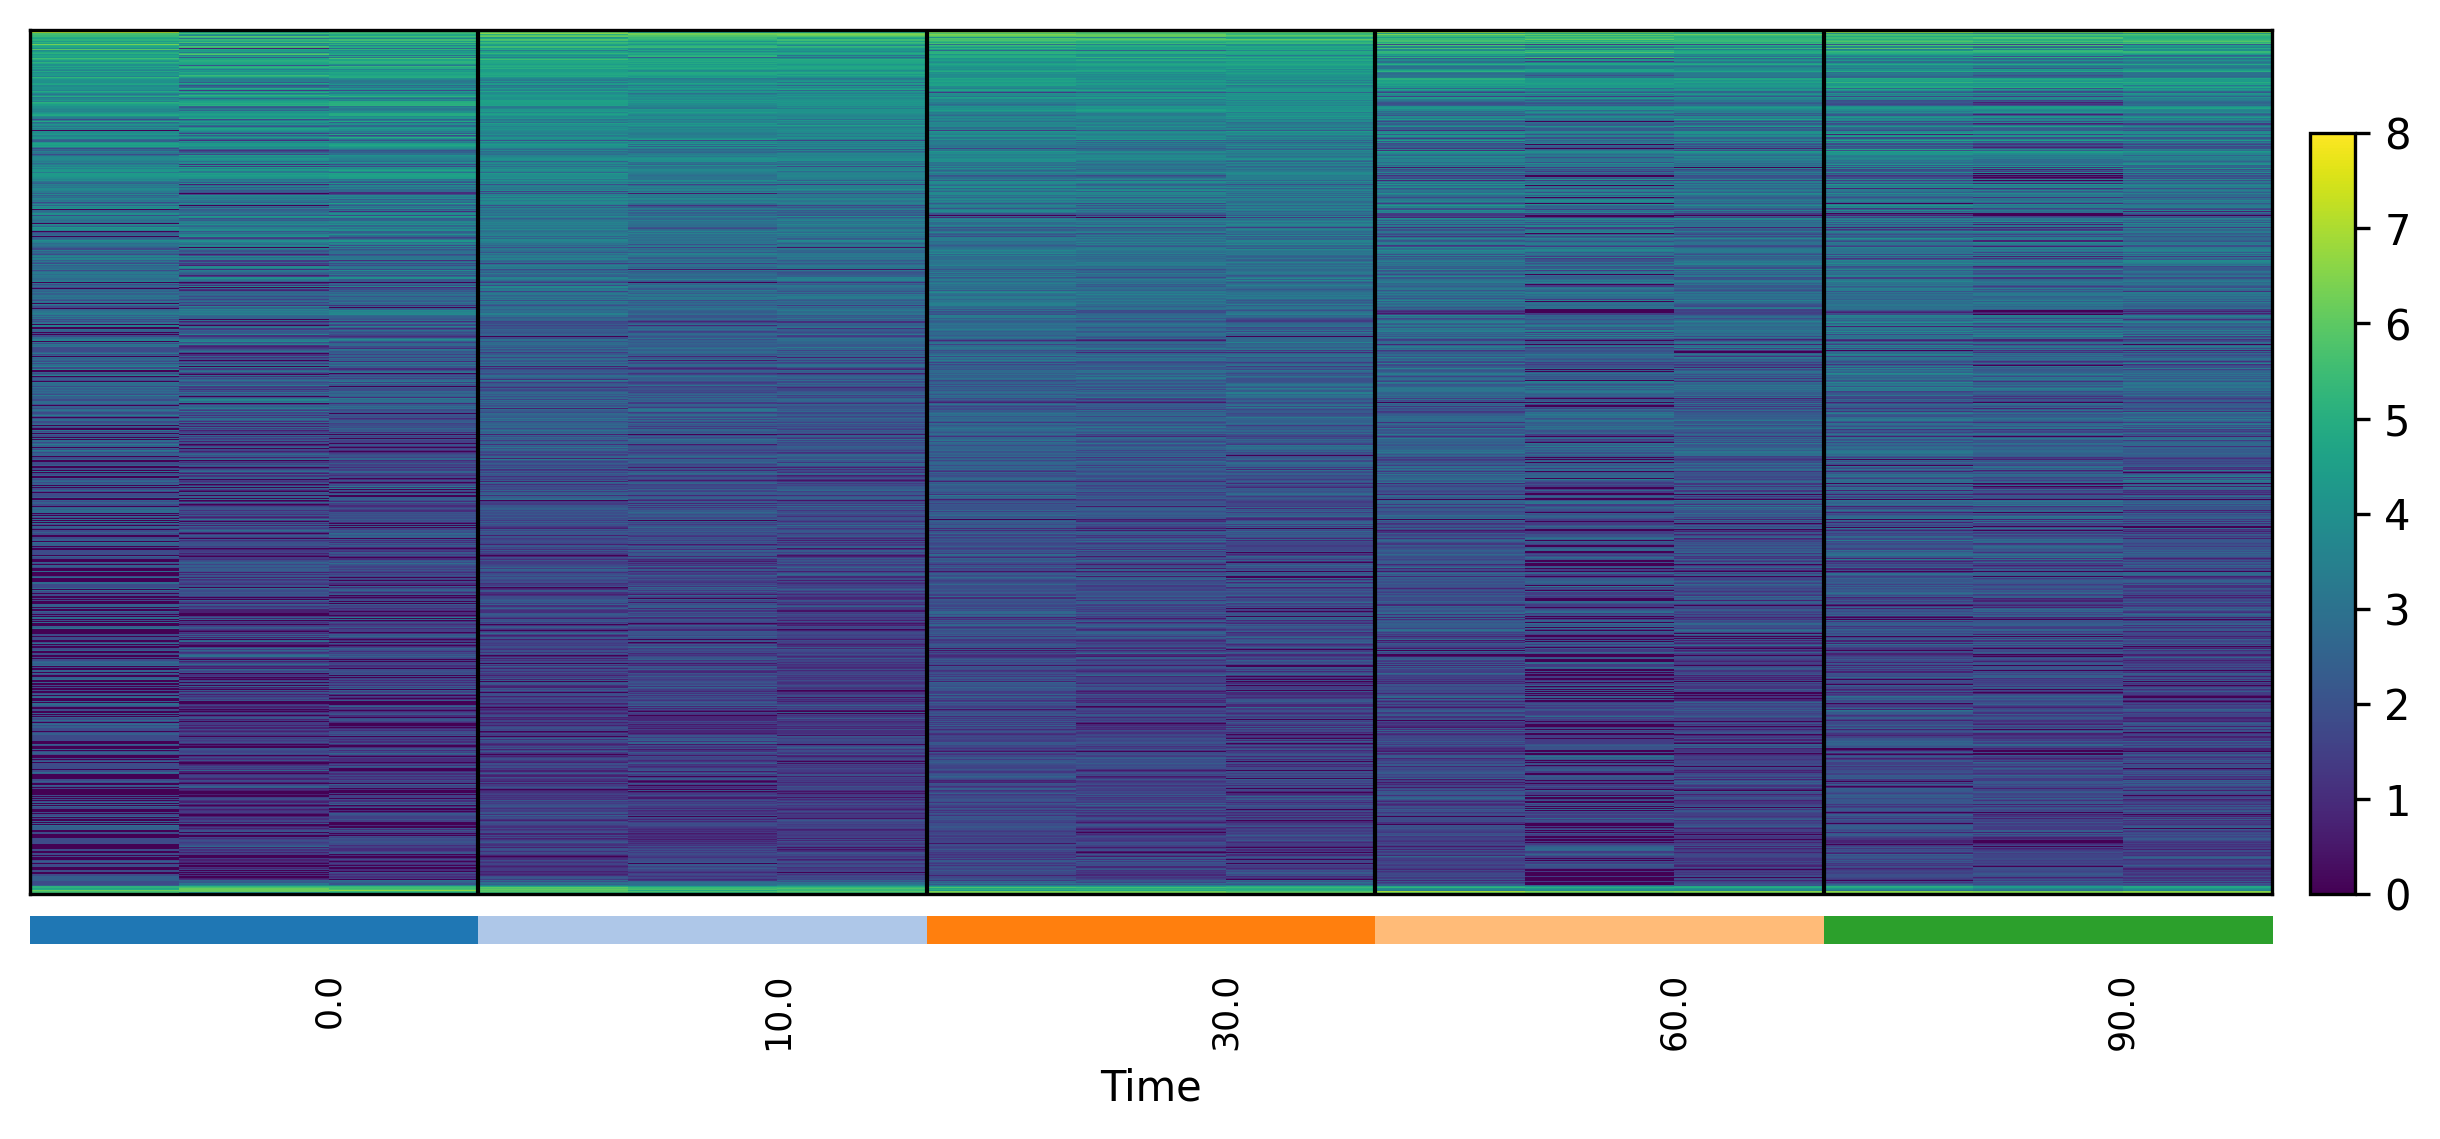

In [29]:
sc.pl.heatmap(adata[adata.obs['Time'].isin(['0.0', '10.0', '30.0', '60.0', '90.0']), :], adata.var_names[_ami_idx], ['Time'], vmin=0, vmax=8, log=True, swap_axes=True)